In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

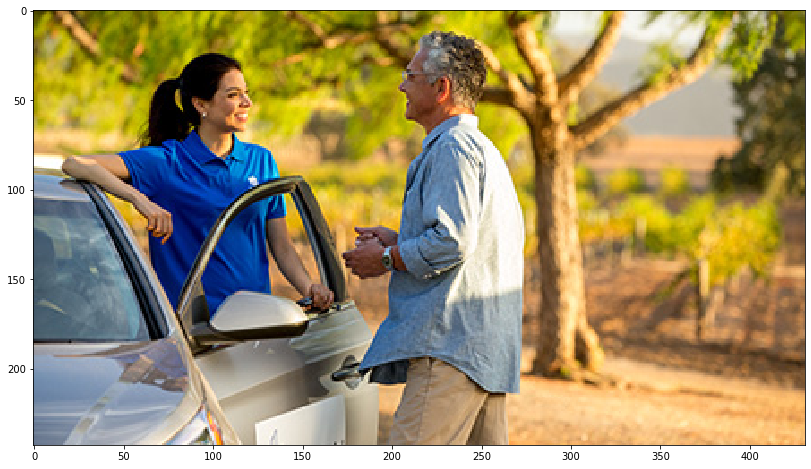

In [2]:
image = cv2.imread('D:/Study/DataScience/OpenCV/carwithpeople3.jpg')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(18,8))
plt.imshow(image)
img_gr = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#plt.imshow(img1)

ret, thresh = cv2.threshold(img_gr, 127, 255, 0)

contours, heirarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
 
#img_cn = cv2.drawContours(image, contours, -1, (255,0,0), 1)

#plt.figure(figsize=(18,8))
#plt.imshow(img_cn)

In [3]:
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 

# fontScale 
fontScale = 1

# text to be placed on image
text = 'This is the tagline'
textsize = cv2.getTextSize(text, font, fontScale, 2)[0]

# origin 
org = (int((image.shape[1]-textsize[0])/2),int(image.shape[0]*15/100))

org_btm = (int((image.shape[1]-textsize[0])/2),image.shape[0] - int(image.shape[0]*15/100))
  
# Yellow font color in RGB 
color = (255,0,0) 
  
# Line thickness of 2 px 
thickness = 2

In [4]:
def findIntersect(image, contours):
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        
        if (x >= org[0] and x <= org[0] + textsize[0]) and (y >= org[1] - textsize[1] and y <= org[1]):
        
            return False
             
        return True

In [5]:
if not findIntersect(image, contours):
    tagged_image = cv2.putText(image, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
else:
    tagged_image = cv2.putText(image, text, org_btm, font, fontScale, color, thickness, cv2.LINE_AA)
    

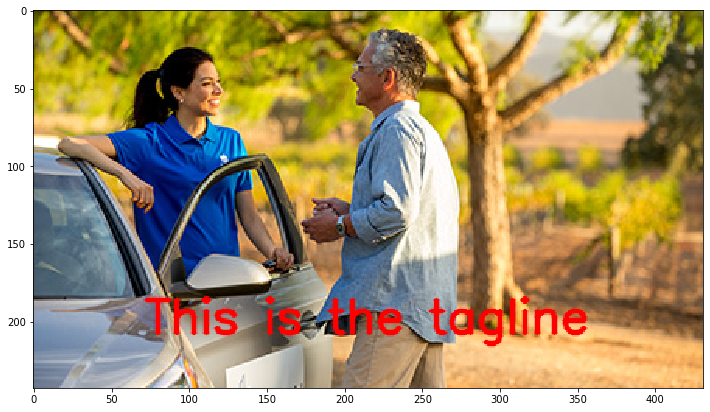

In [6]:
plt.figure(figsize=(12,16))
plt.imshow(tagged_image)

In [8]:
tag = []    
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
        
    if (x >= org[0] and x <= org[0] + textsize[0]) and (y >= org[1] - textsize[1] and y <= org[1]):
        tag.append(1)
    else:
        tag.append(0)

In [12]:
tag_set = set(tag) 
# convert the set to the list 

unique_tag =  (list(tag_set))

print(unique_tag)

if 1 in unique_tag:
    print('It has overlapping objects.')
else:
    print('No, it does not have overlapping objects.')

[0, 1]
It has overlapping objects
